When writing our program, in order to be able to import our data and run and visualize decision trees in Python, there are also a number of libraries that we need to call in, including features from the SKLearn library. Next, I'm going to use the change working directory function from the os library. To indicate where my data set is located. Then I'll load my data set, called tree_addheath.csv. Because decision tree analyses cannot handle any NA's in our data set, my next step is to create a clean data frame that drops all NA's. 
****
Setting the new data frame called data_clean, I can now take a look at various characteristics of my data by using the d types and describe functions to examine data types and summary statistics. Next, I set my explanatory and response or target variables. And then include the train test split function for predictors and target. And set the size ratio to 60% for the training sample and 40% for the test sample by indicating test_size=.4. Here I request the shape of these predictor and target training and test samples. The training sample has 2,745 observations or rows, 60% of our original sample, and 24 explanatory variables. The test sample has 1,830 observations or rows. 40% of the original sample. And again 24 explanatory variables or columns. 
***
Once training and testing data sets have been created, we will initialize the DecisionTreeClassifier from SKLearn. 
****
Then use this classifier.fit function which you pass the training predictors and training targets to. It's this code that will fit our model. 
***
Next we include the predict function where we predict for the test values and then call in the confusion matrix function which we passed the target test sample to. 
****
This shows the correct and incorrect classifications of our decision tree. The diagonal, 1,291 and 117, represent the number of true negative for regular smoking, and the number of true positives, respectively. The 211, on the bottom left, represents the number of false negatives. Classifying regular smokers as not regular smokers. And the 211 on the top right, the number of false positives, classifying a non regular smoker as a regular smoker. We can also look at the accuracy score which is approximately 0.77, which suggests that the decision tree model has classified 77% of the sample correctly as either regular or not regular smokers. 
***
But what does our decision tree look like? To display the final tree, we need to import more features from the SKLearn and other libraries. 
***
Then, with these last three lines of code, we import pi.plus and request the picture of our decision tree. 
****
By trying to view the resulting tree in our console, we can see a limitation of working with decision trees in the context of Python. Specifically the SKLearn library does not currently support pruning of the tree. So we were left with the over fit tree where many branches and leaves do not likely add substantially to our prediction accuracy. So for exploratory purposes it can be helpful to test smaller number of variables in order her first get the feel for the decision tree output. 
****
Here I show a tree with TREG1, my binary regular smoking variable, as the target. And both marijuana use and alcohol use as the predictor or explanatory variables. 
****
The resulting tree starts with the split on X, our first explanatory variable, marijuana use. If the value for marijuana use is less than 0.5, that is no marijuana use since my binary variable has values of zero equal no and one equal yes. Then the observations move to the left side of the split and include 2,068 of the 2,745 individuals in the training sample. 
****
From this node, another split is made on alcohol use, variable X1, such that among those individuals with no marijuana use in the first split and also no alcohol use in the second split, 1,186 of them are not regular smokers, while only 33 are regular smokers. 
***
To the right of that split we see that among those positive for drinking alcohol, that is X1 greater than 0.5, 716 individuals are regular smokers, while 133 are not. 
***
Following down the right side of the tree, the two terminal leaves, or nodes, tell us that among individuals who have used marijuana and drank alcohol, 292 are not regular smokers while 289 are. While among those individuals who have used marijuana but have not drank alcohol, 70 are not regular smokers, while 26 are. By default, SKLearn uses the genie index as the splitting criteria for splitting internal nodes into additional internal or terminal ones. Sometimes called parent and child nodes, as this tree is grown. The goal of the partitioning that occurs when a decision tree is grown is to recursively subdivide in such a way that the values of the target variable for the observations in the terminal or leaf nodes are as similar as possible. 
***
Based on the grow criteria that is selected, the growth process continues, often until it over fits the data. And is likely to perform poorly by not adequately generalizing to new data. 
***
Notably, while decision trees such as this one are easy to interpret, it's also important to recognize that small changes in the data or decisions that you make about the modeling approach lead to very different splits. To illustrate that small changes in the data or even decisions that you make about the modeling approach can lead to different splits and/or different classification of observations, I'll first just rerun the model. 
***
The act of rerunning the model allows Python to again randomly select a 60% training sample that will naturally be somewhat different from the first. 
***
As we can see though, the splits are the same. The number of regular smokers and non regular smokers are slightly different however in each node. 
***
If I add a third variable to my list of explanatory or predictive variables, that is cigarette availability in a home, I see a very different tree. With marijuana used still defining the first split, but alcohol use defining the first split down the left side of the tree. And cigarette availability defining the first split down the right. 
***
Here, for those smoking marijuana and having cigarettes available in their home and drinking alcohol, 92 are non-regular smokers and 139 are regular smokers. Among no alcohol use and no cigarettes available, 939 were non-regular smokers and only 22 were regular smokers. To summarize, decision trees are a type of data-mining algorithm that can select from among a large number of variables those in their interactions that are most important in determining the target or response variable to be explained. They create segmentations or subgroups in the data by applying a series of simple rules or criteria over and over again, which choose variable constellations that best predict the target variable. In this way, they allow for a data driven exploration of non-linear relationships and interactions among explanatory variables. As we've seen, an advantage of decision trees is they're easy to interpret and visualize especially when the tree is very small. Tree based methods also handle large data-sets well. And can predict both binary, categorical target variables, as shown in our example, and also quantitative target variables. However, as we've also shown, small changes in the data can lead to different splits and this can undermine the interpretability of the model. Also decision trees are not very reproducible on future data. This is a detail that we will return to in our next topic random forests. 
Downloads




In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

"""
Data Engineering and Analysis
"""
#Load the dataset

AH_data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\tree_addhealth.csv")

data_clean = AH_data.dropna()

data_clean.dtypes
data_clean.describe()


"""
Modeling and Prediction
"""
#Split into training and testing sets

predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([[1334,  188],
       [ 177,  131]])

In [2]:
sklearn.metrics.accuracy_score(tar_test, predictions)


0.80054644808743169

In [3]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)



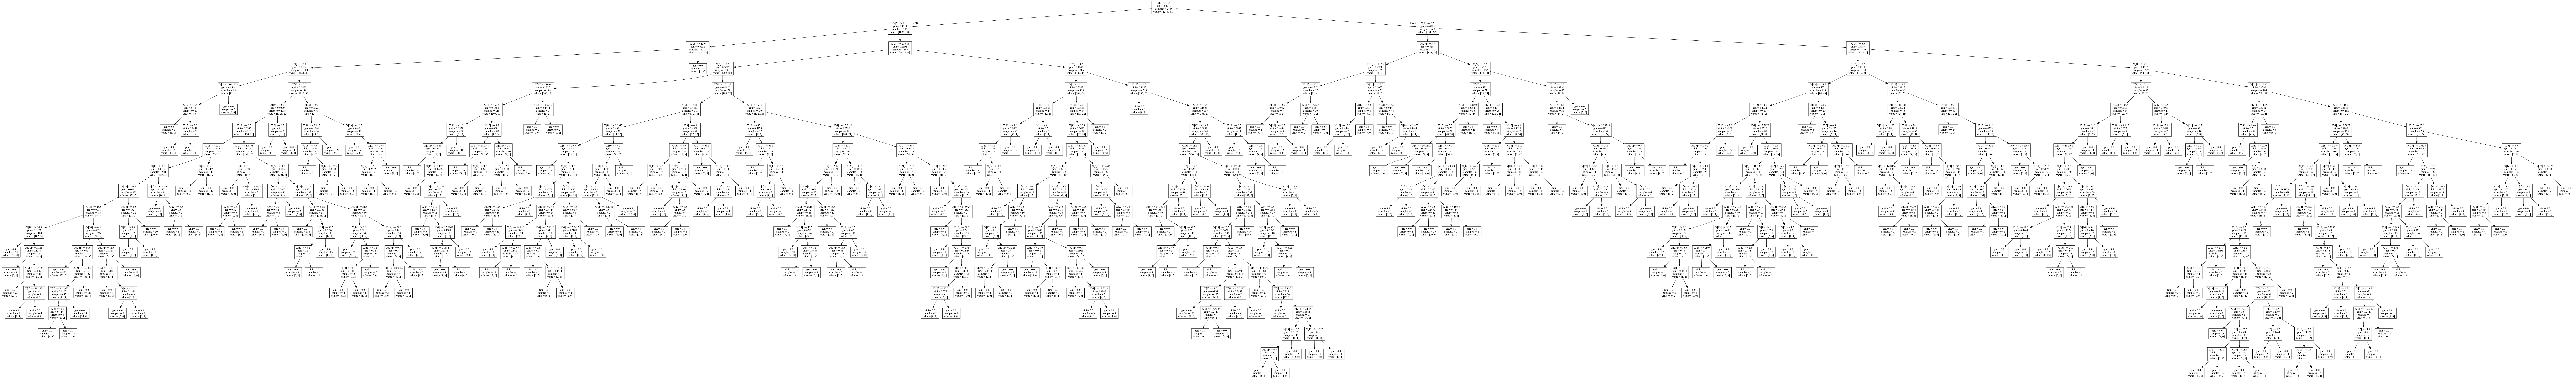

In [6]:
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())


In [10]:
# drawing the tree on fewer variables 
predictors = data_clean[['marever1','ALCEVR1']]
targets = data_clean.TREG1



In [11]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)


array([[1520,    0],
       [ 310,    0]])

In [12]:
sklearn.metrics.accuracy_score(tar_test, predictions)


0.8306010928961749

In [13]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)


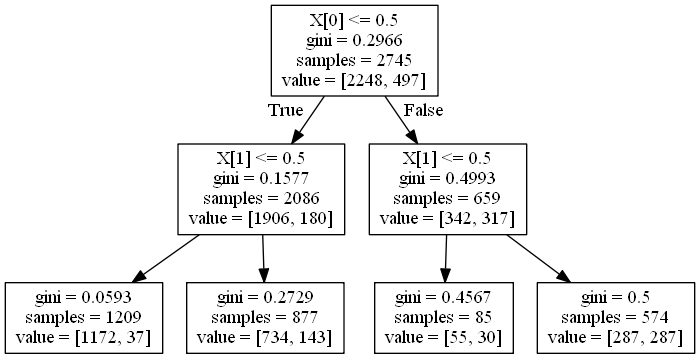

In [15]:
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
